# Project Title
Authors: Kazuma Yamamoto, Sepand Rouz, Amal Eldick

**Instructions**

In this document, include text and code to walk users through your analysis. Feel free to add more cells as you go, but try to keep the five sections provided in order as they are. Feel free to add subsections within each section to organize your project. 

Be sure to change the title and include authors in the first cell.

When finished, download as a PDF and submit the PDF on Gradescope for extra credit. Be sure to include all gorup members. There are up to 15 points extra credit, so even if you don't complete the whole project, completing part of this document will likely earn you some extra credit.

# Question

How does the relationship between the number of guns owned per capita and the incarceration rates for violent crime compare among states in the US?


# Data

Include the code to read your dataset in below and briefly explain what information is included in your dataset that you'll use for analysis.

In [10]:
#importing necessary shortcuts

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [11]:
gunownership=Table.read_table("gunownershipdata.csv")
incarceration=Table.read_table("incarcerationdata.csv")
gunownership,incarceration

(Rank | State           | # of guns per capita | # of guns registered
 1    | Wyoming         | 229.24               | 132806
 2    | Washington D.C. | 68.05                | 47228
 3    | New Hampshire   | 46.76                | 64135
 4    | New Mexico      | 46.73                | 97580
 5    | Virginia        | 36.34                | 307822
 6    | Alabama         | 33.15                | 161641
 7    | Idaho           | 28.86                | 49566
 8    | Arkansas        | 26.57                | 79841
 9    | Nevada          | 25.64                | 76888
 10   | Arizona         | 25.61                | 179738
 ... (41 rows omitted),
 Area          | Year | Population | Violent crime | Rate per 
  100,000
 Connecticut   | 2017 | 3588184    | 8180          | 228
 Maine         | 2017 | 1335907    | 1617          | 121
 Massachusetts | 2017 | 6859819    | 24560         | 358
 New Hampshire | 2017 | 1342795    | 2668          | 198.7
 Rhode Island  | 2017 | 1059639    | 2460        

# Data Wrangling

Include text and code needed to wrangle your data into a tidy data format. If your data are already in a usable format, explain what checks you did on the data (and include the code) to ensure that the data were tidy.

The original datatable on the table for gun ownership was unrunnable at first because the table had irregular row structures, such as having one row be three rows tall. So, I restructured the table on excel to make the table readable on python. At that point, the table was already tidy. The first row contained all the variables, and the subsequent rows contained the values of the variables on each observation, or state.

# Data Analysis

Include text and code to explore and analyze the data your group used for your final project.

First we joined the data together so we can create regression lines to see how the change in one variable changed the change in the other variable.

In [6]:
joined=gunownership.join("State",incarceration,"Area")
joined

State,Rank,# of guns per capita,# of guns registered,Year,Population,Violent crime,"Rate per 100,000"
Alabama,6,33.15,161641,2017,4874747,25551,524.2
Alaska,15,21.38,15824,2017,739795,6133,829
Arizona,10,25.61,179738,2017,7016270,35644,508
Arkansas,8,26.57,79841,2017,3004279,16671,554.9
California,44,8.71,344622,2017,39536653,177627,449.3
Colorado,28,16.48,92435,2017,5607154,20638,368.1
Connecticut,14,22.96,82400,2017,3588184,8180,228
Delaware,49,5.04,4852,2017,961939,4361,453.4
Florida,29,16.35,343288,2017,20984400,85625,408
Georgia,21,18.22,190050,2017,10429379,37258,357.2


The below code creates a scatter plot of each state's # of guns against the # of cases of violent crime.

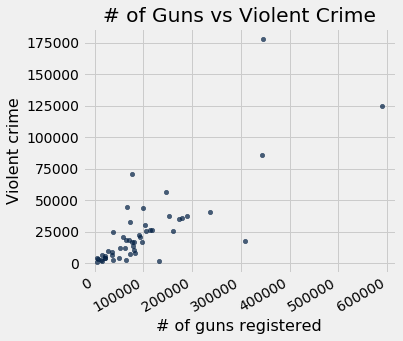

In [12]:
joined.scatter("# of guns registered", "Violent crime")
plt.title("# of Guns vs Violent Crime")
plt.gcf().autofmt_xdate()

This graph has a Pearson's r value of 0.77, as demonstrated by the code below. This suggests a strong positive correlation between the # of guns and the instances of violent crime in a given state.

In [14]:
x1=joined.column("# of guns registered")
y1=joined.column("Violent crime")

joined=joined.with_columns("standard_x1", (x1-np.mean(x1))/np.std(x1),
                         "standard_y1", (y1-np.mean(y1))/np.std(y1))
r1=np.mean(joined.column("standard_x1")*joined.column("standard_y1"))
r1

0.7789675304580135

At first, it would seem that the # of guns directly correlates with the number of violent crime. However, this could be a case of nonuniform data, so we decided to put the values into context by creating new columns with data accounting for the population at hand. We then plotted a graph based on those columns.

In [16]:
joined=joined.with_columns("# of guns per individual", joined.column("# of guns registered")/joined.column("Population"),
                            "Violent crime per individual", joined.column("Violent crime")/joined.column("Population"))
joined

State,Rank,# of guns per capita,# of guns registered,Year,Population,Violent crime,"Rate per 100,000",standard_x1,standard_y1,# of guns per individual,Violent crime per individual
Alabama,6,33.15,161641,2017,4874747,25551,524.2,0.549906,0.000823323,0.0331588,0.0052415
Alaska,15,21.38,15824,2017,739795,6133,829,-0.835697,-0.612186,0.0213897,0.00829013
Arizona,10,25.61,179738,2017,7016270,35644,508,0.72187,0.319451,0.0256173,0.00508019
Arkansas,8,26.57,79841,2017,3004279,16671,554.9,-0.227385,-0.279511,0.0265758,0.00554909
California,44,8.71,344622,2017,39536653,177627,449.3,2.28865,4.80173,0.00871652,0.00449272
Colorado,28,16.48,92435,2017,5607154,20638,368.1,-0.107713,-0.154276,0.0164852,0.00368066
Connecticut,14,22.96,82400,2017,3588184,8180,228,-0.203069,-0.547564,0.0229643,0.0022797
Delaware,49,5.04,4852,2017,961939,4361,453.4,-0.939956,-0.668127,0.00504398,0.00453355
Florida,29,16.35,343288,2017,20984400,85625,408,2.27598,1.89731,0.0163592,0.00408041
Georgia,21,18.22,190050,2017,10429379,37258,357.2,0.819858,0.370403,0.0182226,0.00357241


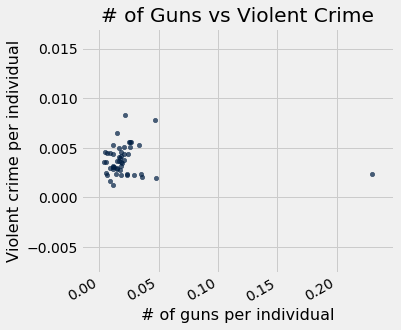

In [18]:
joined.scatter("# of guns per individual", "Violent crime per individual")
plt.title("# of Guns vs Violent Crime")
plt.gcf().autofmt_xdate()

Since this graph is hard to see because of the one value very far to the right, we decided to include a graph without this one point to improve visual clarity.

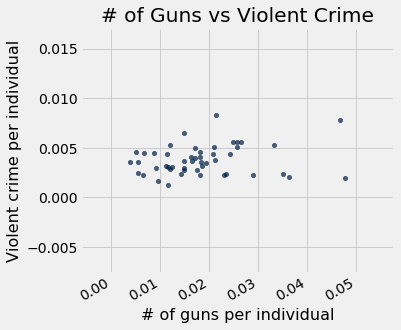

In [20]:
joined.where("# of guns per individual", are.below(0.05)).scatter("# of guns per individual", "Violent crime per individual")
plt.title("# of Guns vs Violent Crime")
plt.gcf().autofmt_xdate()

This graph is far more ambigiuous when it comes to the relationship between the # of guns and the instances of crime. The r value shows this too:


In [21]:
x2=joined.column("# of guns per individual")
y2=joined.column("Violent crime per individual")

joined=joined.with_columns("standard_x2", (x2-np.mean(x2))/np.std(x2),
                         "standard_y2", (y2-np.mean(y2))/np.std(y2))
r2=np.mean(joined.column("standard_x2")*joined.column("standard_y2"))
r2

-0.06975509285535085

This time, the r value is far lower and even negative, at approximately -0.070.

This value lead us to the conclusion that there is no correlation between the # of guns in a given state and the amount of violent crime that occurs in that state.

# Programming Experience

In this section, include information about your team's level of exprience programming in Python. Discuss briefly what new things (concepts, skills, packages, etc.) you learned by completing this extra credit.